In [29]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [30]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [31]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [32]:
def compute_loss(y, tx, w):
    """MSE"""
    e = y-tx.dot(w)
    mse = 0.5* (np.linalg.norm(e)**2)/len(y) 
    """MAE"""
    mae = 0.5 * (np.linalg.norm(e,1))/len(y)
    #return  mse
    return mae


In [33]:
# Test 
w = np.array([1,2]).transpose()

print(compute_loss(y,tx,w))

36.14696100105259


# 2 Grid Search

Fill in the function `grid_search()` below:

In [34]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    for a in range(0,len(w0)):
        for b in range(0,len(w1)):
            w = np.array([w0[a],w1[b]])
            losses[a,b] = compute_loss(y,tx,w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=2.2215045045727897, w0*=72.72727272727272, w1*=13.636363636363626, execution time=1.145 seconds


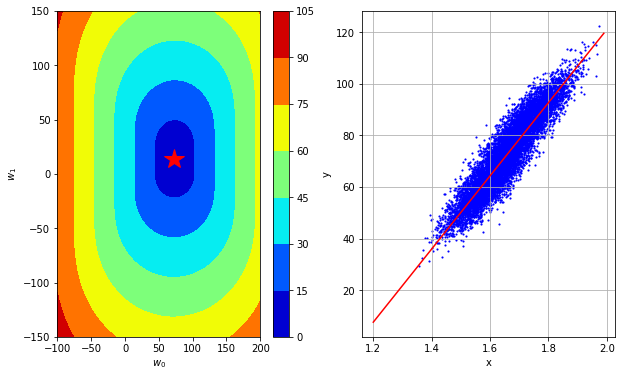

In [35]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [36]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y-tx@w
    n = len(y)
    return (-1/n)*tx.T@e

#test 
w = [100 ,20]
print(compute_gradient(y,tx,w))
w = [50,10]
print(compute_gradient(y,tx,w))


[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [37]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
       
        loss = compute_loss(y,tx,w)
        gradient = compute_gradient(y,tx,w)
        
        w = w-gamma*gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [38]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=36.64696100105259, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=10.994443296177012, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=3.6326510573020743, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=2.349972838348316, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=2.223704882661178, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=2.2131841699454236, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=2.2124542709070245, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=2.212470567177015, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=2.212493380186124, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=2.212501475547383, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=2.212504042304725, w0=73.29379216412119, w1=13.47

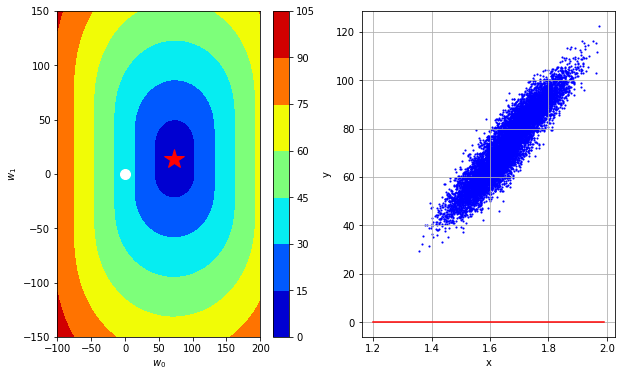

<function __main__.plot_figure(n_iter)>

In [39]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [40]:
from helpers import batch_iter

def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    
    return compute_gradient(y,tx,w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    number_batches = len(y)/batch_size
    for n_iter in range(max_iters):
        for mini_batch_y , mini_batch_tx in batch_iter(y,tx,batch_size):
            gradient = compute_stoch_gradient(mini_batch_y,mini_batch_tx,w)
            w = w-gamma*gradient
            loss = compute_loss(y,tx,w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws
    

In [41]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2
batch_size = 32

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=29.48742624446155, w0=14.319069513182075, w1=1.7031619238936617
Stochastic Gradient Descent(1/49): loss=23.701772960167464, w0=25.890376081770246, w1=3.584017272117138
Stochastic Gradient Descent(2/49): loss=19.265866528485322, w0=34.76218894513453, w1=4.050032983048706
Stochastic Gradient Descent(3/49): loss=15.714747584399074, w0=41.864426833307036, w1=4.786011738617853
Stochastic Gradient Descent(4/49): loss=12.465161579923508, w0=48.3636669160577, w1=7.583435106766007
Stochastic Gradient Descent(5/49): loss=10.219703899864005, w0=52.859996560273466, w1=7.2895144456800685
Stochastic Gradient Descent(6/49): loss=7.954366627875656, w0=57.402118823940306, w1=9.276204572267698
Stochastic Gradient Descent(7/49): loss=6.389957603898408, w0=60.56247464923813, w1=11.278106195875427
Stochastic Gradient Descent(8/49): loss=5.1062102224299135, w0=63.25784309067248, w1=11.521244390031512
Stochastic Gradient Descent(9/49): loss=4.1682575702990174, w0=65.34

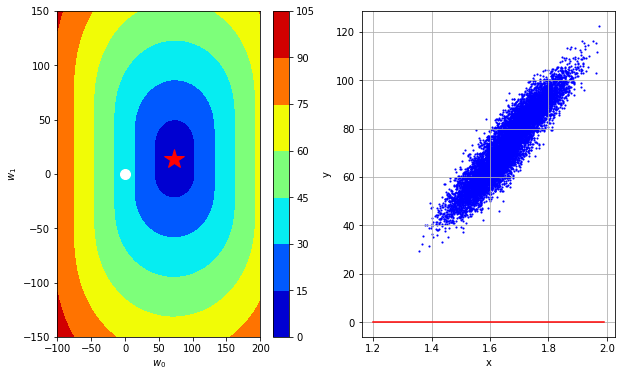

<function __main__.plot_figure(n_iter)>

In [42]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)